In [2]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データセット(breast_cancer)の読み込み
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
#データの確認
    #bc.data
    #bc.target　　　　　 
    #bc.feature_names　 
    #bc.DESCR
#dfの作成
df_data=pd.DataFrame(bc.data,columns=bc.feature_names)
df_target=pd.DataFrame(bc.target,columns=["class"])
df=pd.concat([df_data,df_target],axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


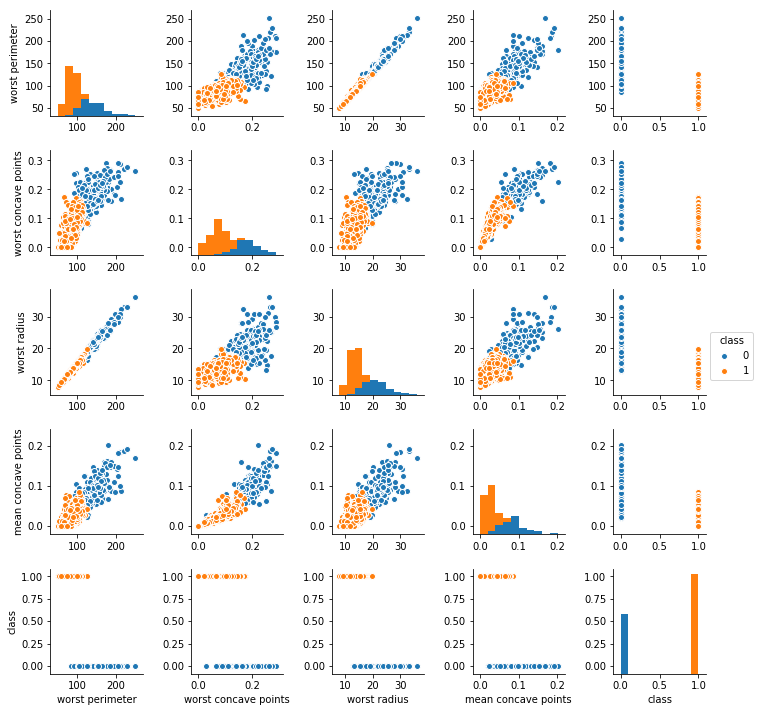

In [3]:
#基本統計量の出力
df.describe()
#特徴力が多いので一部をピックアップ(目的変数も忘れずに)
df_pickup=df.loc[:,['worst perimeter', 'worst concave points', 
                    'worst radius', 'mean concave points', 'class']]
#散布図行列を出力(クラスによって違いがありそうな特徴量を見つける)
import seaborn as sns
sns.pairplot(df_pickup,size=2.0,hue="class") #←classごとに色分け
plt.show()

In [4]:
#データの選択(bc.data,bc.targetからでも良い)
X=df.loc[:,["worst perimeter","mean concave points"]].values
y=df.loc[:,["class"]].values
#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [5]:
# データの分割
from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std,
                            y,test_size=0.3, random_state=0)

In [6]:
#データの学習
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0)  #Cは正則化の弱さ
lr.fit(X_std_train,y_train)

/Users/KANI112094/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

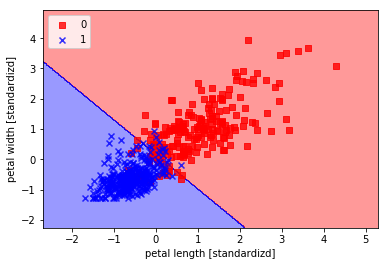

正答率
train:0.930
test:0.924

予測確率[悪性である確率, 良性である確率]
[[ 0.90416777  0.09583223]]
predict: 0
answer : 0


In [8]:
#yを1次元配列に変換
y=y.reshape(-1)

#2次元データの決定曲線と領域を出力する関数を定義
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, 
                    c=cmap(idx),marker=markers[idx], label=cl)
#散布図に決定曲線と領域を出力
plot_decision_regions(X_std, y, lr)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")
plt.legend(loc = "upper left")
plt.show()

#正答率を表示
print("正答率")
print("train:%.3f"%lr.score(X_std_train,y_train))
print("test:%.3f"%lr.score(X_std_test,y_test))

#モデルの利用
print("")
print("予測確率[悪性である確率, 良性である確率]")
print(lr.predict_proba(X_std_test[0].reshape(1,-1)))

#正解と予測のクラスを出力
print('predict: %d' % lr.predict(X_std_test[0].reshape(1, -1)))
print('answer : %d' % y_test[0])